In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import dill

In [107]:
%matplotlib inline
dpi = 700
mpl.rcParams['figure.dpi'] = dpi

## Include path to simulation data

In [6]:
import sys, os
simulations_folder = os.path.join(os.path.abspath('..'), 'simulations')

## Create designated save folder

In [4]:
save_folder = r'defect-position-analysis-figures'
if not os.path.isdir(save_folder):
    os.makedirs(save_folder)

## Read in Zumer figure

In [10]:
zumer_figures_folder = os.path.join(simulations_folder, 'zumer-figures')
zumer_plot_filename = os.path.join(zumer_figures_folder, 'disclination-position-vs-time.PNG')

zumer_plot = plt.imread(zumer_plot_filename)
plt.imshow(zumer_plot)

### Measurements of Zumer figure
* x: 751 - 124, y: 479 - 11
* x: 627, y: 486
* aspect is therefore
* x: 0 at ~180, 2000 at ~636
* y: -30 at ~431, 30 at ~61, 0 at ~246
* First start at ~187, Second start at ~193
* First ending at ~698, Second ending at ~549, Third ending at ~495
* Starting x-positions: 35, 457

* That means 2000/(636 - 180) ~ 4.3860 t-units per pixel
* And 60/(431 - 61) ~ 0.16216 x-units per pixel
* Total range is -245.6 to 2504.4 in the t-direction
* Total range is -37.8 to 38.1 in the x-direction
* First start at t = 30.7, Second start at t = 57.0
* First ending at t = 2271.9, Second ending at t = 1618.4, Third ending at t = 1381.6
* Starting x-positions: -34.2, 34.2

In [45]:
zumer_plot_trim_filename = os.path.join(zumer_figures_folder, 'disclination-position-vs-time-trimmed.PNG')

zumer_plot_trim = plt.imread(zumer_plot_trim_filename)
plt.imshow(zumer_plot_trim, extent=[-245.6, 2504.4, -37.8, 38.1], aspect=25)

## Import flowless and flow data

In [95]:
flowless_data_filename = os.path.join(simulations_folder, 
                                      r'two-disclination-compiled-flowless-simulation-figures\\'
                                       + r'two-disclination-flowless-simulation.pickle')
with open(flowless_data_filename, 'rb') as f:
    flowless_data = dill.load(f)
    
flow_data_filename = os.path.join(simulations_folder, 
                                  r'two-disclination-flow-simulation-figures\\'
                                       + r'two-disclination-flow-simulation.pickle')
with open(flow_data_filename, 'rb') as f:
    flow_data = dill.load(f)

In [96]:
t_flowless = flowless_data['t']
x_flowless = flowless_data['peak_pos_x']
y_flowless = flowless_data['peak_pos_y']

t_flow = flow_data['t']
x_flow = flow_data['peak_pos_x']
y_flow = flow_data['peak_pos_y']

## Truncate data to stop after defects annihilate

In [97]:
annihilate_fl_idx = np.where(x_flowless[0, :] >= 0)[0][0]
t_fl_trunc = t_flowless[:annihilate_fl_idx]
x_fl_trunc = x_flowless[:, :annihilate_fl_idx]
y_fl_trunc = y_flowless[:, :annihilate_fl_idx]

annihilate_f_idx = np.where(x_flow[0, :] >= 0)[0][0]
t_f_trunc = t_flow[:annihilate_f_idx]
x_f_trunc = x_flow[:, :annihilate_f_idx]
y_f_trunc = y_flow[:, :annihilate_f_idx]

## Plot simulation data over Zumer data

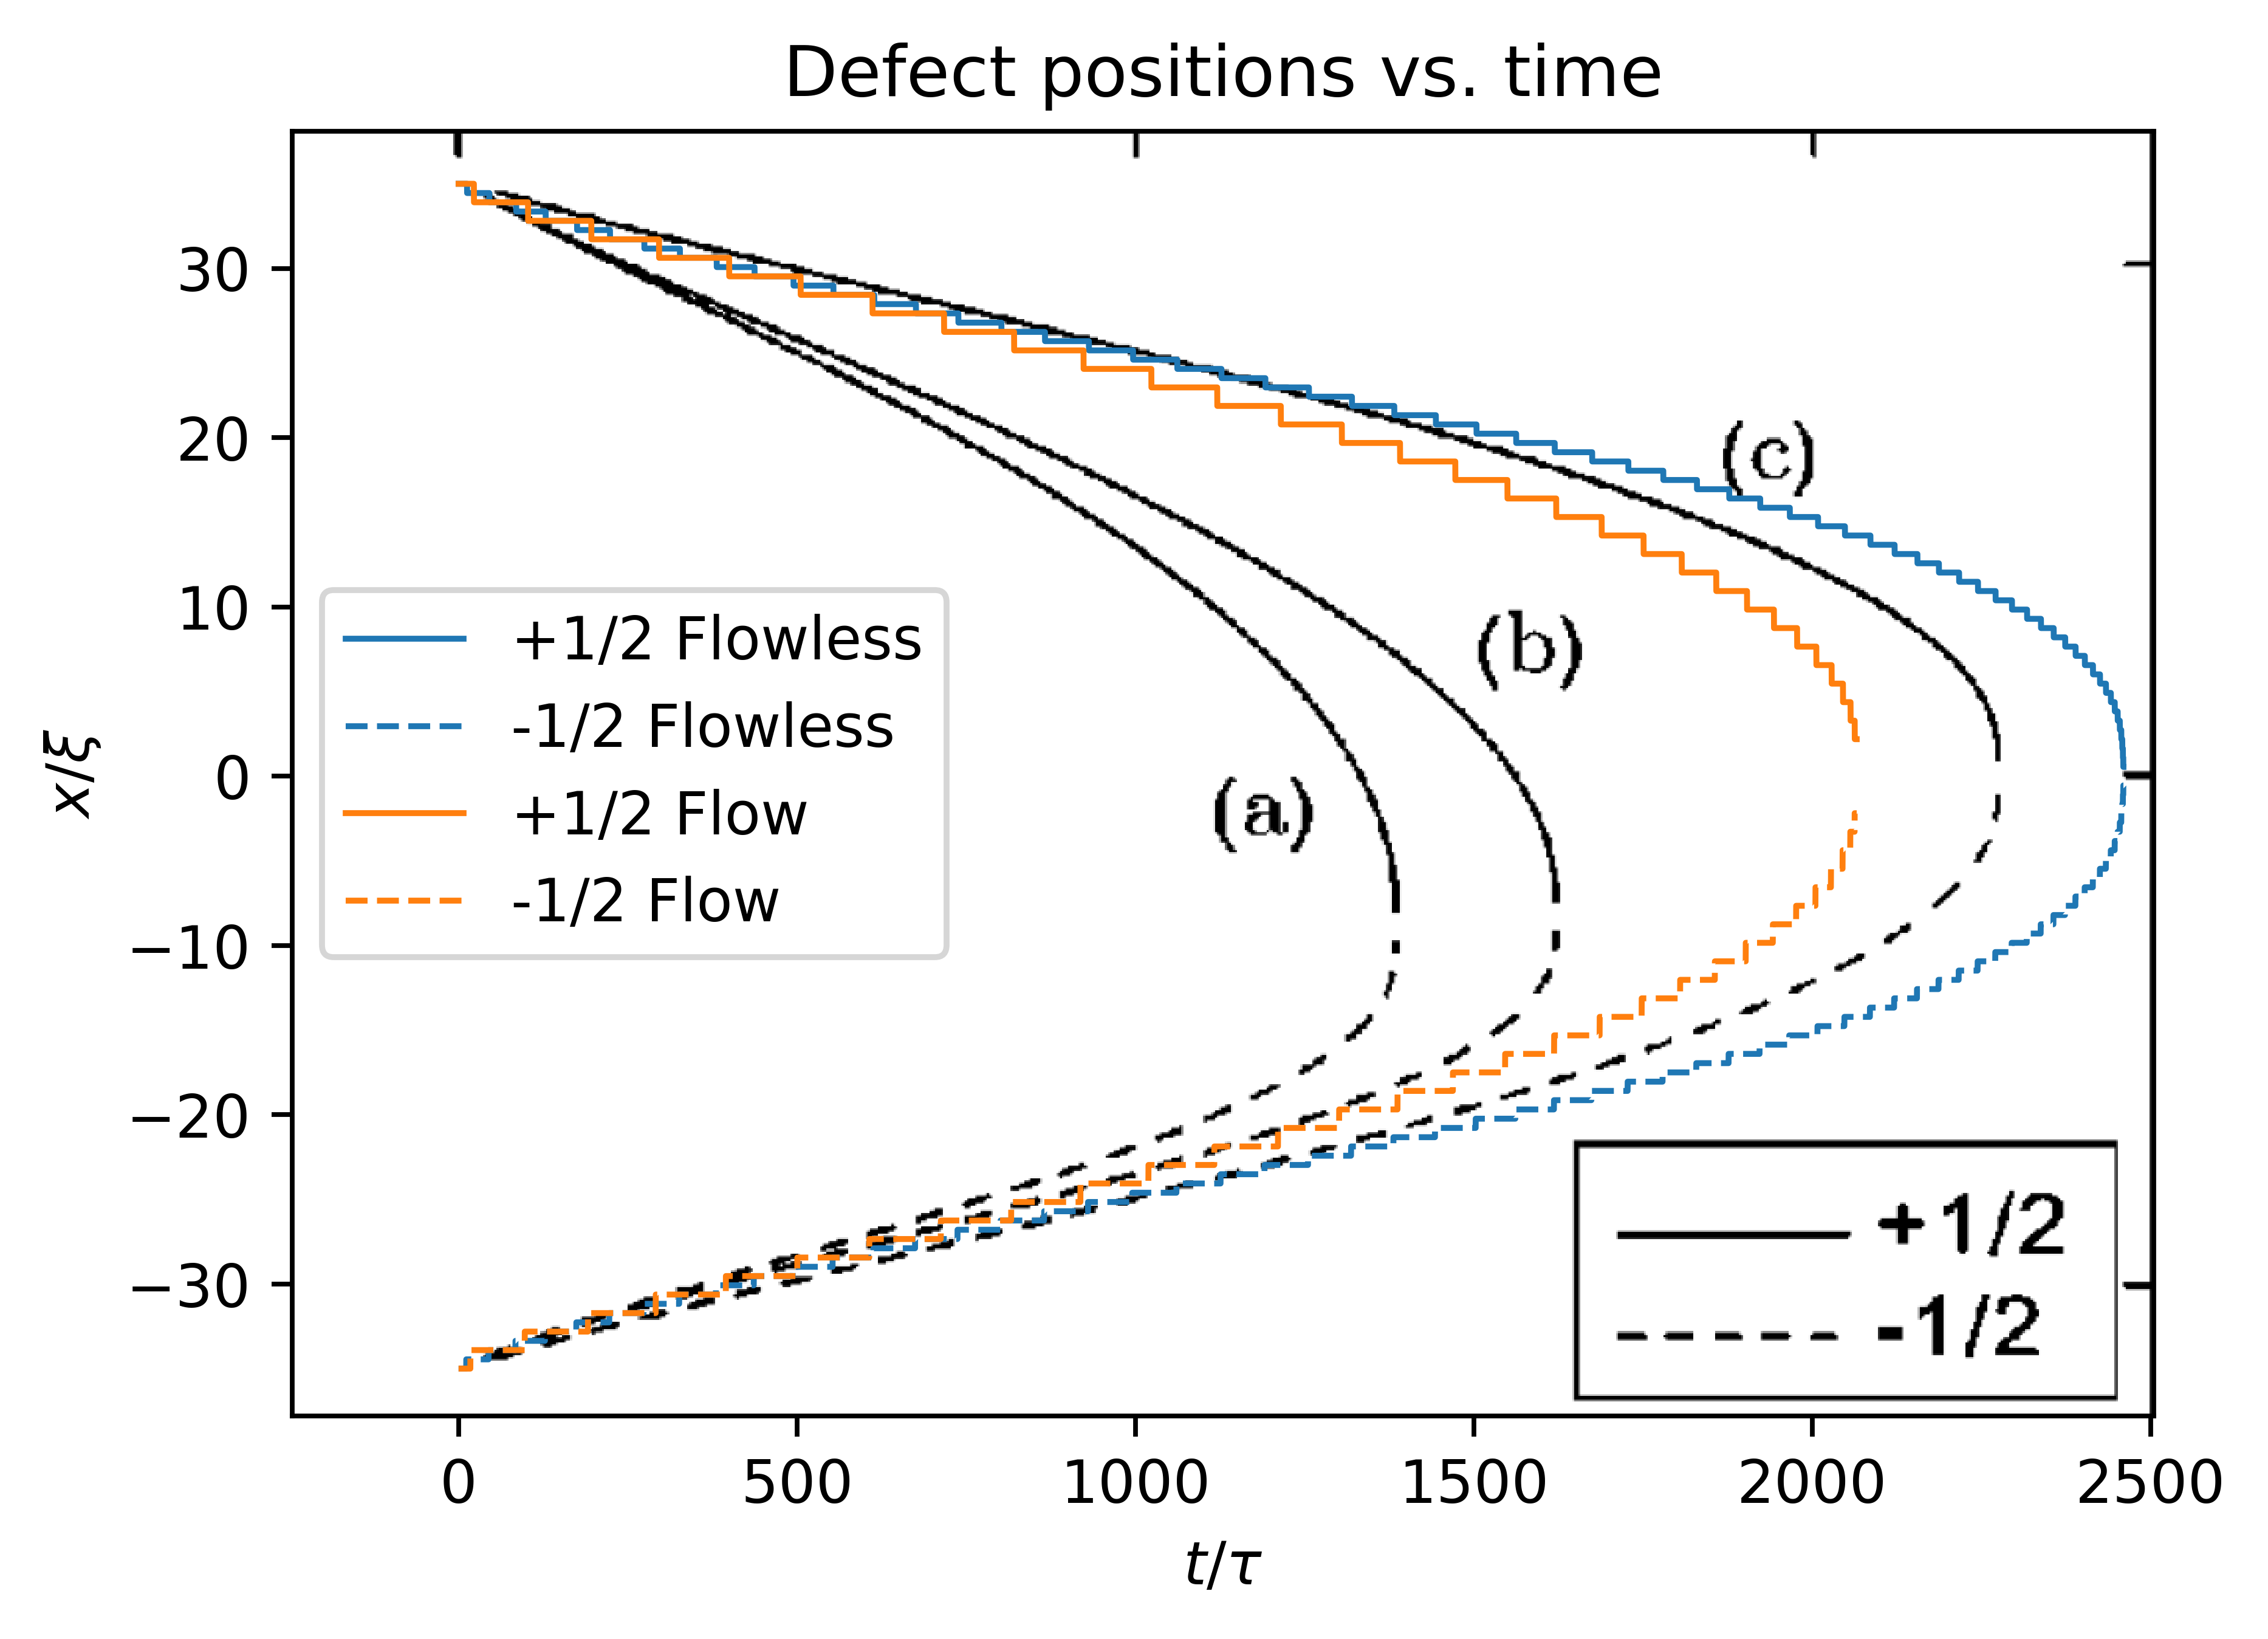

In [109]:
fig, ax = plt.subplots()
ax.imshow(zumer_plot_trim, extent=[-245.6, 2504.4, -37.8, 38.1], aspect=25)

ax.plot(t_fl_trunc, -x_fl_trunc[0, :], c='C0', lw=1, label='+1/2 Flowless')
ax.plot(t_fl_trunc, -x_fl_trunc[1, :], c='C0', ls='--', lw=1, label='-1/2 Flowless')
ax.plot(t_f_trunc, -x_f_trunc[0, :], c='C1', lw=1, label='+1/2 Flow')
ax.plot(t_f_trunc, -x_f_trunc[1, :], c='C1', ls='--', lw=1, label='-1/2 Flow')

ax.legend()
ax.set_title("Defect positions vs. time")
ax.set_xlabel(r'$t/\tau$')
ax.set_ylabel(r'$x/\xi$')

plot_filename = os.path.join(save_folder, 'defect-pos-vs-time.png')
fig.savefig(plot_filename)